# ENSEMBLE LEARNING 

***Definition*** - Ensemble learning is a general meta approach to machine learning that seeks better predictive performance by combining the predictions from multiple models.

**Reading Content** - https://machinelearningmastery.com/tour-of-ensemble-learning-algorithms/
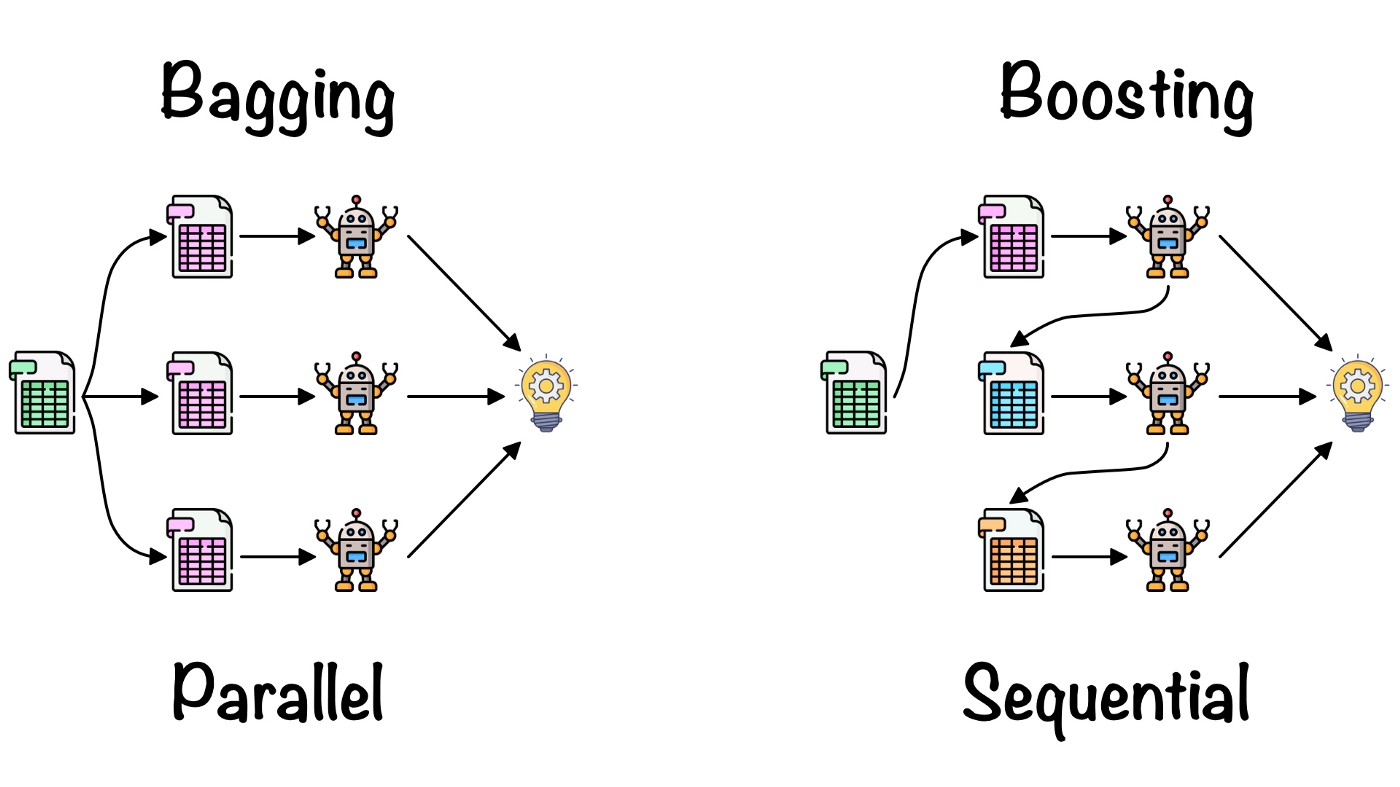
**Image Source** - TowardsDataScience

## Building Classifiers for Diabetes dataset using AdaBoost and XGBoost

The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.All patients here are females of at least 21 years old of Pima Indian heritage.

**Independent variables**
	
1. Pregnancies : number of times pregnant
2. Glucose : plasma glucose concentration 
3. BloodPressure : Diastolic blood pressure (mm Hg)
4. SkinThickness : Triceps skin fold thickness (mm)
4. Insulin : 2-Hour serum insulin (mu U/ml)
5. BMI : Body mass index 
6. DiabetesPedigreeFunction : Diabetes pedigree function
7. Age : age in years

**Target variable**

Outcome : categorical variable (0 or 1) 

In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [3]:
pima_diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [4]:
pima_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
array = pima_diabetes.values

In [8]:
X = array[:,0:8]
Y = array[:,8]
print(X)
print(Y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 

### AdaBoostClassifier

In [10]:
kfold = model_selection.KFold(n_splits = 10, random_state = 1)
model = AdaBoostClassifier(n_estimators = 30, random_state = 1)
results = model_selection.cross_val_score(model,X,Y,cv=kfold)
print(results)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.67532468 0.80519481 0.7012987  0.68831169 0.75324675 0.80519481
 0.79220779 0.83116883 0.73684211 0.81578947]


In [11]:
print(results.mean())

0.760457963089542


### XGBClassifier

In [12]:
kfold = model_selection.KFold(n_splits = 10, random_state = 1)
model = XGBClassifier(n_estimators = 30, random_state = 1)
results = model_selection.cross_val_score(model,X,Y,cv=kfold)
print(results)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.71428571 0.79220779 0.68831169 0.66233766 0.79220779 0.79220779
 0.79220779 0.80519481 0.68421053 0.77631579]


In [13]:
print(results.mean())

0.7499487354750513
